In [11]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Read the data from CSV file
df = pd.read_csv("Office_Garman.csv")
df = df.set_index('timestamp')
df.index = pd.to_datetime(df.index)

# Define the split date
split_date = '2015-09-30'

# Split the data into training and testing sets
train = df.loc[:split_date]
test = df.loc[split_date:]

# Read holiday schedule
holiday_schedule = pd.read_csv("schedule9.csv", header=None)
holiday_schedule.columns = ['date', 'holiday_flag']
holiday_schedule['date'] = pd.to_datetime(holiday_schedule['date'])
holiday_schedule = holiday_schedule.set_index('date')

# Read weather data
weather_data = pd.read_csv("weather5.csv")
weather_data = weather_data.set_index('timestamp')
weather_data.index = pd.to_datetime(weather_data.index)

# Merge holiday schedule with df
df = df.merge(holiday_schedule, how='left', left_index=True, right_index=True)

# Merge weather data with df
df = df.merge(weather_data, how='left', left_index=True, right_index=True)

def preprocess_data(df):
    """
    Preprocess the data by converting object columns to numeric or categorical types.
    """
    df = df.copy()
    
    # Convert object columns to numeric or categorical types
    df['Conditions'] = pd.Categorical(df['Conditions']).codes
    df['Events'] = pd.Categorical(df['Events']).codes
    df['Gust SpeedKm/h'] = pd.to_numeric(df['Gust SpeedKm/h'], errors='coerce')
    df['TimeBST'] = pd.to_numeric(df['TimeBST'], errors='coerce')
    df['TimeGMT'] = pd.to_numeric(df['TimeGMT'], errors='coerce')
    df['Wind Direction'] = pd.Categorical(df['Wind Direction']).codes
    df['Wind SpeedKm/h'] = pd.to_numeric(df['Wind SpeedKm/h'], errors='coerce')
    df['holiday_flag'] = pd.to_numeric(df['holiday_flag'], errors='coerce')
    
    return df

df = preprocess_data(df)

# Split the data into training and testing sets
train = df.loc[:split_date]
test = df.loc[split_date:]

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year',
            'Conditions', 'Dew PointC', 'Events', 'Gust SpeedKm/h', 'Humidity',
            'Precipitationmm', 'Sea Level PressurehPa', 'TemperatureC',
            'TimeBST', 'TimeGMT', 'VisibilityKm', 'Wind Direction',
            'Wind SpeedKm/h', 'WindDirDegrees', 'holiday_flag']
TARGET = 'Office_Garman'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

test['prediction'] = reg.predict(X_test)

# Plotting the results
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Office_Garman']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Office_Garman - True Data vs Predictions')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.show()



KeyError: "['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year'] not in index"

[18:26:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:375.71406	validation_1-rmse:373.86980
[100]	validation_0-rmse:165.56751	validation_1-rmse:159.15014
[200]	validation_0-rmse:110.31048	validation_1-rmse:99.13525
[300]	validation_0-rmse:100.62517	validation_1-rmse:87.69733
[400]	validation_0-rmse:99.25539	validation_1-rmse:85.92216
[500]	validation_0-rmse:99.07037	validation_1-rmse:85.63484
[600]	validation_0-rmse:99.04555	validation_1-rmse:85.57918
[700]	validation_0-rmse:99.04222	validation_1-rmse:85.56547
[800]	validation_0-rmse:99.04178	validation_1-rmse:85.56134
[900]	validation_0-rmse:99.04172	validation_1-rmse:85.55995
[999]	validation_0-rmse:99.04171	validation_1-rmse:85.55946


/var/folders/p5/4n4tz9b556x0wctr33bl1jkh0000gp/T/ipykernel_11855/642978900.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


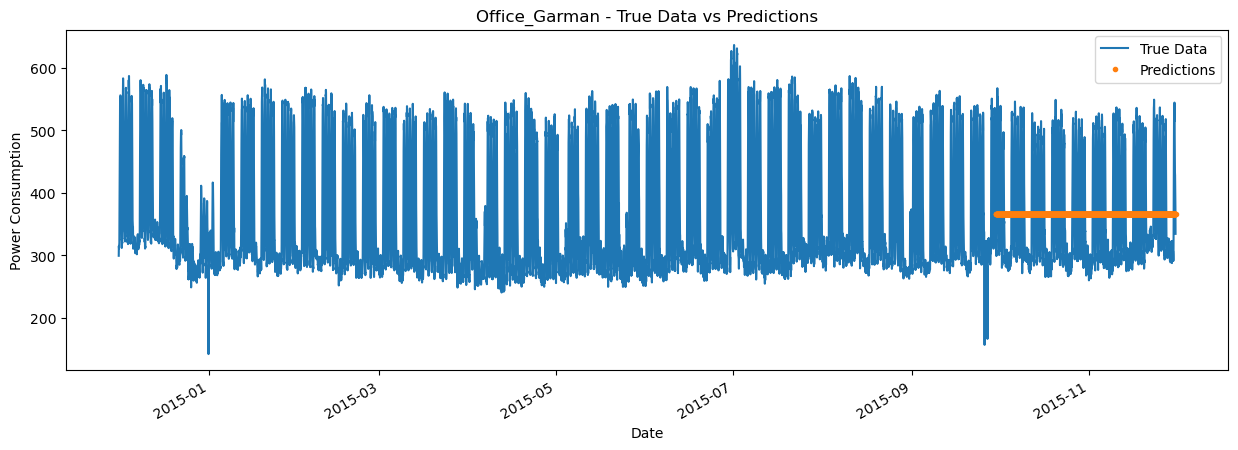

In [12]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Read the data from CSV file
df = pd.read_csv("Office_Garman.csv")
df = df.set_index('timestamp')
df.index = pd.to_datetime(df.index)

# Define the split date
split_date = '2015-09-30'

# Split the data into training and testing sets
train = df.loc[:split_date]
test = df.loc[split_date:]

# Read holiday schedule
holiday_schedule = pd.read_csv("schedule9.csv", header=None)
holiday_schedule.columns = ['date', 'holiday_flag']
holiday_schedule['date'] = pd.to_datetime(holiday_schedule['date'])
holiday_schedule = holiday_schedule.set_index('date')

# Read weather data
weather_data = pd.read_csv("weather5.csv")
weather_data = weather_data.set_index('timestamp')
weather_data.index = pd.to_datetime(weather_data.index)

# Merge holiday schedule with df
df = df.merge(holiday_schedule, how='left', left_index=True, right_index=True)

# Merge weather data with df
df = df.merge(weather_data, how='left', left_index=True, right_index=True)

def preprocess_data(df):
    """
    Preprocess the data by converting object columns to numeric or categorical types.
    """
    df = df.copy()

    # Convert object columns to numeric or categorical types
    df['Conditions'] = pd.Categorical(df['Conditions']).codes
    df['Events'] = pd.Categorical(df['Events']).codes
    df['Gust SpeedKm/h'] = pd.to_numeric(df['Gust SpeedKm/h'], errors='coerce')
    df['TimeBST'] = pd.to_numeric(df['TimeBST'], errors='coerce')
    df['TimeGMT'] = pd.to_numeric(df['TimeGMT'], errors='coerce')
    df['Wind Direction'] = pd.Categorical(df['Wind Direction']).codes
    df['Wind SpeedKm/h'] = pd.to_numeric(df['Wind SpeedKm/h'], errors='coerce')
    df['holiday_flag'] = pd.to_numeric(df['holiday_flag'], errors='coerce')

    return df

df = preprocess_data(df)

# Split the data into training and testing sets
train = df.loc[:split_date]
test = df.loc[split_date:]

FEATURES = ['Conditions', 'Dew PointC', 'Events', 'Gust SpeedKm/h', 'Humidity',
            'Precipitationmm', 'Sea Level PressurehPa', 'TemperatureC',
            'TimeBST', 'TimeGMT', 'VisibilityKm', 'Wind Direction',
            'Wind SpeedKm/h', 'WindDirDegrees', 'holiday_flag']
TARGET = 'Office_Garman'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

test['prediction'] = reg.predict(X_test)

# Plotting the results
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Office_Garman']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')

# Plotting the results
plt.legend(['True Data', 'Predictions'])
ax.set_title('Office_Garman - True Data vs Predictions')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.show()



In [13]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Read the data from CSV file
df = pd.read_csv("Office_Garman.csv")
df = df.set_index('timestamp')
df.index = pd.to_datetime(df.index)

# Define the split date
split_date = '2015-09-30'

# Split the data into training and testing sets
train = df.loc[:split_date]
test = df.loc[split_date:]

# Read holiday schedule
holiday_schedule = pd.read_csv("schedule9.csv", header=None)
holiday_schedule.columns = ['date', 'holiday_flag']
holiday_schedule['date'] = pd.to_datetime(holiday_schedule['date'])
holiday_schedule = holiday_schedule.set_index('date')

# Read weather data
weather_data = pd.read_csv("weather5.csv")
weather_data = weather_data.set_index('timestamp')
weather_data.index = pd.to_datetime(weather_data.index)

# Merge holiday schedule with df
df = df.merge(holiday_schedule, how='left', left_index=True, right_index=True)

# Merge weather data with df
df = df.merge(weather_data, how='left', left_index=True, right_index=True)

def preprocess_data(df):
    """
    Preprocess the data by converting object columns to numeric or categorical types.
    """
    df = df.copy()
    
    # Convert object columns to numeric or categorical types
    df['Conditions'] = pd.Categorical(df['Conditions']).codes
    df['Events'] = pd.Categorical(df['Events']).codes
    df['Gust SpeedKm/h'] = pd.to_numeric(df['Gust SpeedKm/h'], errors='coerce')
    df['TimeBST'] = pd.to_numeric(df['TimeBST'], errors='coerce')
    df['TimeGMT'] = pd.to_numeric(df['TimeGMT'], errors='coerce')
    df['Wind Direction'] = pd.Categorical(df['Wind Direction']).codes
    df['Wind SpeedKm/h'] = pd.to_numeric(df['Wind SpeedKm/h'], errors='coerce')
    df['holiday_flag'] = pd.to_numeric(df['holiday_flag'], errors='coerce')
    
    return df

df = preprocess_data(df)

# Split the data into training and testing sets
train = df.loc[:split_date]
test = df.loc[split_date:]

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year',
            'Conditions', 'Dew PointC', 'Events', 'Gust SpeedKm/h', 'Humidity',
            'Precipitationmm', 'Sea Level PressurehPa', 'TemperatureC',
            'TimeBST', 'TimeGMT', 'VisibilityKm', 'Wind Direction',
            'Wind SpeedKm/h', 'WindDirDegrees', 'holiday_flag']
TARGET = 'Office_Garman'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

test['prediction'] = reg.predict(X_test.copy())

# Plotting the results
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Office_Garman']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Office_Garman - True Data vs Predictions')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.show()


KeyError: "['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year'] not in index"